<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Wrangle-and-Analyse-Data---WeRateDogs-Twitter" data-toc-modified-id="Wrangle-and-Analyse-Data---WeRateDogs-Twitter-1">Wrangle and Analyse Data - WeRateDogs Twitter</a></span><ul class="toc-item"><li><span><a href="#Wrangling-Data" data-toc-modified-id="Wrangling-Data-1.1">Wrangling Data</a></span><ul class="toc-item"><li><span><a href="#Gathering-Data" data-toc-modified-id="Gathering-Data-1.1.1">Gathering Data</a></span><ul class="toc-item"><li><span><a href="#1.-Reading-on-hand-file-to-DataFrame" data-toc-modified-id="1.-Reading-on-hand-file-to-DataFrame-1.1.1.1">1. Reading on-hand file to DataFrame</a></span></li><li><span><a href="#2.-Retrieve-file-from-URL-and-store-into-DataFrame" data-toc-modified-id="2.-Retrieve-file-from-URL-and-store-into-DataFrame-1.1.1.2">2. Retrieve file from URL and store into DataFrame</a></span></li><li><span><a href="#3.-Retrieve-JSON-using-Twitter-API-and-store-in-DataFrame" data-toc-modified-id="3.-Retrieve-JSON-using-Twitter-API-and-store-in-DataFrame-1.1.1.3">3. Retrieve JSON using Twitter API and store in DataFrame</a></span></li></ul></li><li><span><a href="#Assessing-and-Cleaning-Data" data-toc-modified-id="Assessing-and-Cleaning-Data-1.1.2">Assessing and Cleaning Data</a></span><ul class="toc-item"><li><span><a href="#Preliminary-Assessment" data-toc-modified-id="Preliminary-Assessment-1.1.2.1">Preliminary Assessment</a></span></li><li><span><a href="#Summary-of-Issues" data-toc-modified-id="Summary-of-Issues-1.1.2.2">Summary of Issues</a></span><ul class="toc-item"><li><span><a href="#Quality-issues:" data-toc-modified-id="Quality-issues:-1.1.2.2.1">Quality issues:</a></span></li><li><span><a href="#Tidiness-issues:" data-toc-modified-id="Tidiness-issues:-1.1.2.2.2">Tidiness issues:</a></span></li></ul></li><li><span><a href="#Data-Cleaning-and-Further-Assessment" data-toc-modified-id="Data-Cleaning-and-Further-Assessment-1.1.2.3">Data Cleaning and Further Assessment</a></span><ul class="toc-item"><li><span><a href="#1.-Standardising-date-format" data-toc-modified-id="1.-Standardising-date-format-1.1.2.3.1">1. Standardising date format</a></span></li><li><span><a href="#2.-Removing-identified-errorenous-entries" data-toc-modified-id="2.-Removing-identified-errorenous-entries-1.1.2.3.2">2. Removing identified errorenous entries</a></span></li><li><span><a href="#3.-Correcting-identified-erroreous-rating-values" data-toc-modified-id="3.-Correcting-identified-erroreous-rating-values-1.1.2.3.3">3. Correcting identified erroreous rating values</a></span></li><li><span><a href="#4.-Replace-None-in-name-column-with-null-and-remove-non-name-items" data-toc-modified-id="4.-Replace-None-in-name-column-with-null-and-remove-non-name-items-1.1.2.3.4">4. Replace None in name column with null and remove non-name items</a></span></li><li><span><a href="#5.-Clean-dog-stage-values-and-merge-to-one-column" data-toc-modified-id="5.-Clean-dog-stage-values-and-merge-to-one-column-1.1.2.3.5">5. Clean dog stage values and merge to one column</a></span></li><li><span><a href="#6.-Removing-retweets" data-toc-modified-id="6.-Removing-retweets-1.1.2.3.6">6. Removing retweets</a></span></li><li><span><a href="#7.-Add-normalised-rating-column" data-toc-modified-id="7.-Add-normalised-rating-column-1.1.2.3.7">7. Add normalised rating column</a></span></li><li><span><a href="#5.-Creating-usable-image-recognition-column" data-toc-modified-id="5.-Creating-usable-image-recognition-column-1.1.2.3.8">5. Creating usable image recognition column</a></span></li><li><span><a href="#6.-Joining-dataframes-into-single-dataframe-for-analysis" data-toc-modified-id="6.-Joining-dataframes-into-single-dataframe-for-analysis-1.1.2.3.9">6. Joining dataframes into single dataframe for analysis</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Analyzing-and-Visualizing-Data" data-toc-modified-id="Analyzing-and-Visualizing-Data-1.2">Analyzing and Visualizing Data</a></span><ul class="toc-item"><li><span><a href="#Popularity-and-Trends-over-Time" data-toc-modified-id="Popularity-and-Trends-over-Time-1.2.1">Popularity and Trends over Time</a></span></li><li><span><a href="#Relationship-between-Rating-Score-and-Engagement" data-toc-modified-id="Relationship-between-Rating-Score-and-Engagement-1.2.2">Relationship between Rating Score and Engagement</a></span></li><li><span><a href="#Relationship-between-Dog-Stages-Terms,-Rating-and-Engagement" data-toc-modified-id="Relationship-between-Dog-Stages-Terms,-Rating-and-Engagement-1.2.3">Relationship between Dog Stages Terms, Rating and Engagement</a></span></li><li><span><a href="#Relationship-between-Dog-Breed,-Rating-and-Engagement" data-toc-modified-id="Relationship-between-Dog-Breed,-Rating-and-Engagement-1.2.4">Relationship between Dog Breed, Rating and Engagement</a></span></li></ul></li></ul></li></ul></div>

# Wrangle and Analyse Data - WeRateDogs Twitter

This project is one of the deliverables for Udacity's Data Analyst Nanodegree course, which includes wrangling, analysing and visualising data from the WeRateDogs Twitter account (@dog_rates). This is done using Python and the necessary packages per below:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import timeit
import requests
import os
import datetime
from IPython.display import Image 

# Note: Jupyter Notebook created using Monokai dark theme from JupyterThemes package
# The below will set up styles for plots for viewability on a dark background
from jupyterthemes import jtplot
jtplot.style('monokai')

%matplotlib inline

## Wrangling Data

Wrangling data include gathering, assesssing and cleaning the data

### Gathering Data

For this project, the following data were gathered from 3 sources:
<ol>
    <li> `twitter_archive_enhanced.csv` - a file-on-hand provided by Udacity</li>
    <li> `image_predictions.tsv` - a file to be downloaded from Udacity's URL</li>
    <li> `tweet_json.txt` - JSON data to be retrived from Twitter using an API</li>
</ol>

#### 1. Reading on-hand file to DataFrame

For the first file, pandas's read_csv() is used to store the csv file in a new dataframe:

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Retrieve file from URL and store into DataFrame

Image prediction data are retrieved from the relevant URL:

In [3]:
# Define URL and send a get request
image_predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predict_url)

In [4]:
# Print response's statust code and type of content in case of debugging
print(response.status_code)
print(response.headers['content-type'])

200
text/tab-separated-values; charset=utf-8


In [5]:
# If file doesn't already exist, save file with filename as last segment of URL
filename = image_predict_url.split('/')[-1]

if not os.path.exists(filename):
    open(image_predict_url.split('/')[-1], mode='wb').write(response.content)
else:
    print('File already exists')

File already exists


Next, the image-predictions.tsv file is read and save as a dataframe:

In [6]:
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Retrieve JSON using Twitter API and store in DataFrame

Using Tweepy package to query Twitter API for each tweet (from the tweet archive file from Part 1), and store the JSON in separate lines in a text file:

In [7]:
# API and access token for Twitter API
# HIDE VALUES BEFORE SUBMITTING
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_token_secret = 'HIDDEN'

In [8]:
filename = 'tweet_json.txt'
fails_dict = {}

# Checks if file already exists
if not os.path.exists(filename):
    # Authorisation
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)

    # Retrieve tweet json info from API and store line-by-line in text file
    # Error messages and their respective tweet ID stored in fails_dict
    # Source: example code in Udacity project page
    count = 0
    start = timeit.default_timer()
    with open(filename, 'w') as outfile:
        for tweet_id in twitter_archive['tweet_id']:
            count += 1
            print(str(count) + ': ' + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print('Success')
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print('Fail')
                fails_dict[tweet_id] = e
                pass
    end = timeit.default_timer()
    print(end - start)
    print(fails_dict)
else:
    print('File already exists')

File already exists


Using Pandas's read_json(), the JSON file contents are stored in a dataframe:

In [9]:
pd.set_option('display.max_columns', None)
tweets_from_api = pd.read_json('tweet_json.txt', lines=True)
tweets_from_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7417,35140,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5516,30417,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3641,22875,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7584,38404,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8168,36656,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


Inspect the error messages to see if any action should be taken to fix the errors:

In [10]:
fails_dict

{}

Based on the error messages recorded, it appears that most of the tweets that have errors has been deleted, and one tweet was hidden by the account owner. As there are no realistic way to solve this error, the unrecoverable information for these tweets will be excluded in the relevant analyses.

### Assessing and Cleaning Data

#### Preliminary Assessment

Firstly, inspect the info() of the twitter_archive dataframe:

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From this, it can be seen that timestamp is stored as a string. To improve the quality of data, it should be stored in a date-time format recognised by Pandas.

Columns including name and "dog stages" has no non-null cells, which seem unexpected as there should be some tweets where the names and stage have not been identified. We'll look at these in details further below.

Next, check the describe() results of twitter_archive:

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


It can be seen that another issue is the minimum value of rating denominator being 0. This should be considered an invalid data as dividing by 0 would cause error. Another issue seems to be to be that the maximum value (1776) appears to be unusually high.

Further investigate the values of rating denominators:

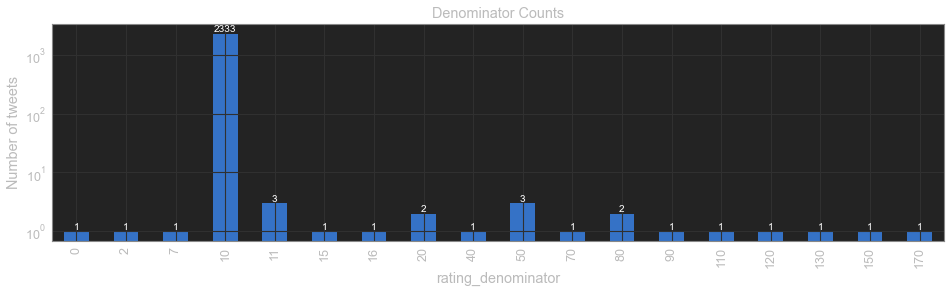

In [13]:
rating_deno_freq = twitter_archive.groupby('rating_denominator')['tweet_id'].count()
plt.figure(figsize=(16, 4))
ax = rating_deno_freq.plot(kind='bar');
ax.set_ylabel('Number of tweets')
ax.set_yscale('log')
ax.set_title('Denominator Counts')

rects = ax.patches
labels = rating_deno_freq

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom', color='white')
    
plt.show()

It can be seen that the vast majority (over 2,300) of the tweets have rating denominator of 10, while other values are quite rare, appearing 1-3 times each.

To explore this, query the table for tweets where the detected ratings do not have a value of 10:

In [14]:
pd.set_option('display.max_colwidth', None)
twitter_archive.query('rating_denominator != 10')[
    ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


Based on these tweets, as well as viewing the images associated with the original tweets online, it can be seen that the page uses a standard rating denominator of 10 for each dog rated (see below), and denominators which are higher multiples of 10 are for ratings of groups of dogs. 

![10 scale](inconsistent-scale.png)

For example, a rating of a picture of 7 dogs would have a denominator of 70.

![7 dogs](7-dogs.png)

As such, it is a safe assumption that rating denominators which are not multiple of 10s are invalid values. Based on the screening of non-10 values above, we can identify instances where the detection algorithm did not retrieve the correct values for the denominators and numerators:
- 835246439529840640: not a rating tweet, actually a reply to another user
- 832088576586297345: not a rating tweet, actually a date
- 810984652412424192: not a rating tweet, actually an expression (24/7)
- 775096608509886464: retrived wrong number as rating (9/11), rating actually 14/10
- 722974582966214656: retrived wrong number as rating (4/20), rating actually 13/10
- 716439118184652801: retrived wrong number as rating (50/50), rating actually 11/10
- 686035780142297088: not a rating tweet
- 684225744407494656: Re-rating of tweet id 684222868335505415
- 684222868335505415: Re-rated in another tweet
- 682962037429899265: retrived wrong number as rating (7/11), rating actually 10/10
- 682808988178739200: not a rating tweet
- 666287406224695296: retrived wrong number as rating (1/2), rating actually 9/10

Additionally, tweet 684225744407494656 is a re-rating of tweet id 684222868335505415. In order to avoid double-counting, the earlier tweet should be excluded.

Since certain tweets has a different denominator to 10, the numerators of each row is not directly comparable. For comparison, a normalised rating column should be created by dividing the numerator with the denominator.

Next, investigate the extreme values of the numerator:

In [15]:
twitter_archive[['tweet_id', 'text', 
                 'rating_numerator', 
                 'rating_denominator']].sort_values('rating_numerator', ascending=False)

,tweet_id,text,rating_numerator,rating_denominator
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
...,...,...,...,...
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
2038,671550332464455680,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


It appears that the high ratings are valid (except for 960/00 which was already identified previously), but they appear to be joke values based on number references. These abnormally high values and could be considered outliers for the purpose of analysis.

The next part to investigate is the "dog stage" columns ('doggo', 'floofer', 'pupper', 'puppo'). It is investigated if these stages are mutually exclusive or if a dog can have multiple "stages". For this, filter for rows where there are less than 3 'None' in the 4 columns, which implies that such row has multiple dog stages listed:

In [16]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

twitter_archive[twitter_archive[dog_stages].isin(['None']).sum(axis=1) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [17]:
twitter_archive[twitter_archive[dog_stages].isin(
    ['None']).sum(axis=1) < 3]['tweet_id'].count()

14

Based on the above, it can be seen that there are 14 rows where multiple dog stages are listed. Based on investigating the texts, there are instances that a dog is classified with multiple terms, leading to multiple dog stage terms being identified.

However, based on the specifications given in the assignment, the dog stage term should be mutually exclusive for a single dog. As such, these 14 rows should be investigated.

After these rows with multiple dog stage term are cleaned, the information should then be merged into a single dog stage column in accordance to tidy data standard.

In [18]:
twitter_archive[twitter_archive[dog_stages].isin(
    ['None']).sum(axis=1) < 3][np.append(['tweet_id', 'text'], dog_stages)]

,tweet_id,text,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper,None
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None
778,775898661951791106,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None
822,770093767776997377,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None


From the above, we can see the following issues:
- One term used to refer to the rating's subject but anothe term is used to refer to something else, but the algorithm picks up both terms. The latter term should be removed.
- 2 dogs are in the image, with each term referring to each dog. In order to preserve information, both terms will be kept in the dog stage column

It should be noted that some of the above tweets are retweets. These will be ignored as discussed further below in this section.

Thus, the following cleaning actions should be taken:
- 855851453814013952 - remove doggo and keep puppo
- 854010172552949760 - remove doggo and keep floofer
- 817777686764523521 - remove doggo and keep pupper
- 808106460588765185 - 2 dogs, keep both terms
- 802265048156610565 - 2 dogs, keep both terms
- 801115127852503040 - remove doggo and keep pupper 
- 785639753186217984 - remove doggo and keep pupper 
- 781308096455073793 - 2 dogs, keep both terms
- 775898661951791106 - retweet, ignore 
- 770093767776997377 - retweet, ignore
- 759793422261743616 - 2 dogs, keep both terms
- 751583847268179968 - remove pupper and keep doggo
- 741067306818797568 - 2 dogs, keep both terms
- 733109485275860992 - 2 dogs, keep both terms

Next, investigate the tweets_from_api information:

In [19]:
tweets_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [20]:
tweets_from_api.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2331.000000,2331.000000,2197.0,2197.0,2.600000e+01,2.600000e+01
mean,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2606.382668,7338.412269,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4409.709420,11395.726854,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,529.000000,1273.500000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1217.000000,3188.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3024.500000,8978.000000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,74854.000000,151150.000000,0.0,0.0,8.860534e+17,8.860534e+17


Based on the above, it can be seen that a lot of the information is duplicate of the information we already have in twitter_archive dataframe. There is one column which seems to be important which is 'retweeted_status' which appears to flag tweets which are retweets. Retweets are investigated below:

In [21]:
tweets_from_api[~tweets_from_api['retweeted_status'].isnull()][['id','full_text','entities']]

,id,full_text,entities
31,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,"{'hashtags': [{'text': 'BATP', 'indices': [21, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Athletics', 'name': 'Oakland A's', 'id': 19607400, 'id_str': '19607400', 'indices': [3, 13]}], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [27, 50]}]}"
35,885311592912609280,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 830583314243268608, 'id_str': '830583314243268608', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'url': 'https://t.co/SATN4If5H5', 'display_url': 'pic.twitter.com/SATN4If5H5', 'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}, 'source_status_id': 830583320585068544, 'source_status_id_str': '830583320585068544', 'source_user_id': 4196983835, 'source_user_id_str': '4196983835'}]}"
67,879130579576475649,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}"
72,878404777348136964,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}"
73,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}"
...,...,...,...
999,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}"
1019,743835915802583040,RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}"
1218,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,"{'hashtags': [{'text': 'LoveTwitter', 'indices': [61, 73]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Twitter', 'name': 'Twitter', 'id': 783214, 'id_str': '783214', 'indices': [3, 11]}, {'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [13, 23]}], 'urls': [], 'media': [{'id': 711998175234510848, 'id_str': '711998175234510848', 'indices': [74, 97], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/CeGGkWuUUAAYWU1.jpg', 'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/CeG

It can be seen that some tweets are retweets of rating by other accounts, while others are retweets of past ratings by WeRateDogs's own account. Per below, the original tweets have already been included in the archive, and thus counting the retweets would lead to double-counting:

In [22]:
tweets_from_api.query('id == 830583320585068544')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
342,2017-02-12 01:04:29+00:00,830583320585068544,830583320585068544,This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 830583314243268608, 'id_str': '830583314243268608', 'indices': [95, 118], 'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'url': 'https://t.co/SATN4If5H5', 'display_url': 'pic.twitter.com/SATN4If5H5', 'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}","{'media': [{'id': 830583314243268608, 'id_str': '830583314243268608', 'indices': [95, 118], 'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'url': 'https://t.co/SATN4If5H5', 'display_url': 'pic.twitter.com/SATN4If5H5', 'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}, {'id': 830583314213896192, 'id_str': '830583314213896192', 'indices': [95, 118], 'media_url': 'http://pbs.twimg.com/media/C4bTH6gWAAAV2ex.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C4bTH6gWAAAV2ex.jpg', 'url': 'https://t.co/SATN4If5H5', 'display_url': 'pic.twitter.com/SATN4If5H5', 'expanded_url': 'https://twitter.com/dog_rates/status/830583320585068544/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'links and things ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/6ytGi24QCk', 'entities': {'url': {'urls': [{'url': 'https://t.co/6ytGi24QCk', 'expanded_url': 'http://campsite.bio/weratedogs', 'display_url': 'campsite.bio/weratedogs', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8947074, 'friends_count': 18, 'listed_count': 6261, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 146129, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 13305, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1351720980972933122/I3MnYUdm_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1351720980972933122/I3MnYUdm

As such, these retweets post should be excluded.

Next, investigate data from the img_predictions table:

In [23]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


It can be seen that the image prediction table gives the top 3 predictions of each image, with the corresponding confidence value between 0 and 1, with a maximum value of 1.0 for the first prediction.

The prediction results in more details below:

In [25]:
img_predictions.sort_values('p1_conf', ascending=False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,1.002880e-05,True,Eskimo_dog,1.434470e-06,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,1.448950e-05,True,wok,6.060880e-06,False
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,4.309810e-05,False,ram,2.160900e-07,False
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,2.335910e-05,True,dhole,3.010330e-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,6.253600e-02,False,gorilla,5.889360e-02,False
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/762035577168560129/pu/img/kD4TeHRRiSKgOyDx.jpg,1,home_theater,0.063152,False,cash_machine,4.669210e-02,False,theater_curtain,4.627680e-02,False
1093,719704490224398336,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,home_theater,0.059033,False,window_shade,3.829900e-02,False,bathtub,3.552820e-02,False
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,5.432210e-02,True,whippet,5.191340e-02,True


It can be seen that a lot of prediction results don't yield dog breeds. In fact, the top three results with the highest confidence are not for dogs. However, based on the unique results, the majority of predictions appear to be for dog breeds as seen below.

In [26]:
img_predictions.groupby('p1').count().sort_values('tweet_id', ascending=False)

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1,,,,,,,,,,,
golden_retriever,150,150,150,150,150,150,150,150,150,150,150
Labrador_retriever,100,100,100,100,100,100,100,100,100,100,100
Pembroke,89,89,89,89,89,89,89,89,89,89,89
Chihuahua,83,83,83,83,83,83,83,83,83,83,83
pug,57,57,57,57,57,57,57,57,57,57,57
...,...,...,...,...,...,...,...,...,...,...,...
hay,1,1,1,1,1,1,1,1,1,1,1
hotdog,1,1,1,1,1,1,1,1,1,1,1
hummingbird,1,1,1,1,1,1,1,1,1,1,1


In [27]:
img_predictions.groupby('p2').count().sort_values('tweet_id', ascending=False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2_conf,p2_dog,p3,p3_conf,p3_dog
p2,,,,,,,,,,,
Labrador_retriever,104,104,104,104,104,104,104,104,104,104,104
golden_retriever,92,92,92,92,92,92,92,92,92,92,92
Cardigan,73,73,73,73,73,73,73,73,73,73,73
Chihuahua,44,44,44,44,44,44,44,44,44,44,44
Pomeranian,42,42,42,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...
hyena,1,1,1,1,1,1,1,1,1,1,1
iPod,1,1,1,1,1,1,1,1,1,1,1
ice_lolly,1,1,1,1,1,1,1,1,1,1,1


In [28]:
img_predictions.groupby('p3').count().sort_values('tweet_id', ascending=False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3_conf,p3_dog
p3,,,,,,,,,,,
Labrador_retriever,79,79,79,79,79,79,79,79,79,79,79
Chihuahua,58,58,58,58,58,58,58,58,58,58,58
golden_retriever,48,48,48,48,48,48,48,48,48,48,48
Eskimo_dog,38,38,38,38,38,38,38,38,38,38,38
kelpie,35,35,35,35,35,35,35,35,35,35,35
...,...,...,...,...,...,...,...,...,...,...,...
ibex,1,1,1,1,1,1,1,1,1,1,1
jaguar,1,1,1,1,1,1,1,1,1,1,1
jeep,1,1,1,1,1,1,1,1,1,1,1


Additionally, after checking random samples of results against the original image, it can be seen that sometimes the breed had not been correctly identified, especially for results with lower confidence levels.

#### Summary of Issues

Based on the above findings, the following issued were identified:

##### Quality issues:
<ol>
    <li>Completeness - some entries are not retrievable using Twitter API due to having been deleted or made inaccessible by the owner </li>
    <li>Consistency - timestamp data is not in date-time format</li>
    <li>Validity - rating denominator entry of 0 - divide by 0 will produce error</li>
    <li>Consistency - rating numerator is not always directly comparable with each other as some are based on different denominators - should be normalised for consistency</li>
    <li>Validity - Certain tweets are retweets of older tweets, which lead to duplicated data, or other users' tweets (including ratings by third parties), which shouldn't be included in the analysis. Retweets should be removed</li>
    <li>Accuracy - inaccurate information in some rows, particularly those where recorded denominator is not 10, due to extracting function not extracting the correct data. This includes:
        <ul>
            <li>835246439529840640: not a rating tweet, actually a reply to another user</li>
            <li>832088576586297345: not a rating tweet, actually a date</li>
            <li>810984652412424192: not a rating tweet, actually an expression (24/7)</li>
            <li>775096608509886464: retrived wrong number as rating (9/11), rating actually 14/10</li>
            <li>722974582966214656: retrived wrong number as rating (4/20), rating actually 13/10</li>
            <li>716439118184652801: retrived wrong number as rating (50/50), rating actually 11/10</li>
            <li>686035780142297088: not a rating tweet</li>
            <li>682962037429899265: retrived wrong number as rating (7/11), rating actually 10/10</li>
            <li>682808988178739200: not a rating tweet</li>
            <li>666287406224695296: retrived wrong number as rating (1/2), rating actually 9/10</li>
        </ul>
    </li>
    <li>Accuracy - There are "correction" entries where an older entry is re-rated. Leaving both original and re-rated rows would double-count the submission
        <ul>
            <li>684225744407494656: Re-rating of tweet id 684222868335505415</li>
        </ul>
    </li>
    <li>Accuracy - some rows with multiple dog stage terms should be corrected to 1 term only. These include:
        <ul>
            <li>855851453814013952 - remove doggo and keep puppo </li>
            <li>854010172552949760 - remove doggo and keep floofer</li>
            <li>817777686764523521 - remove doggo and keep pupper</li>
            <li>801115127852503040 - remove doggo and keep pupper</li>
            <li>785639753186217984 - remove doggo and keep pupper</li>
            <li>751583847268179968 - remove pupper and keep doggo</li>
        </ul>
    </li>
    <li>Consistency - 'name' column has string 'None' where no name is found. For easier analysis it should be replaced with null</li>
    <li>Validity - image prediction results give results which aren't dog breeds. For analysis, non-dog breed results should not be used and using only results where breed is sufficiently confidently identified</li>
    <li>Accuracy - image prediction results, even for high confidence levels, may not have identified the correct dog breed.</li>
    <li>Validity - non-names have been identified as name, as the algorithm appears to have pulled any word after the phase "This is" and record as name <i>(identified in next section)</i></li>
</ol>

##### Tidiness issues:
<ol>
    <li>Data across all 3 tables are based on observational units of individual tweets, therefore they can be merged into a single table</li>
    <li>As dog stage terms are a single variable, they should be merged into a single column</li>
    
</ol>

Out of these issues, we will attempt to fix most of them except for the completeness issues of favourite and retweet data for tweets which had been deleted or hidden, and issue regarding incorrect dog breed being identified as that would involve manually checking every qualified image prediction results.

#### Data Cleaning and Further Assessment
##### 1. Standardising date format
The first issue to address is the date-time format.

Firstly, check the date-time format string used in the original data: 

In [29]:
# Create new dataframe for cleaning
twitter_archive_clean = twitter_archive.copy()

twitter_archive_clean['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

Since the time format appears to be standard, Pandas's to_datetime() function should be able to convert the strings.

###### Define:
Use to_datetime() function to convert timestamp column into datetime format

###### Code:

In [30]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

###### Test:

The column's data type should now be datetime:

In [31]:
twitter_archive_clean['timestamp'] 

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

##### 2. Removing identified errorenous entries

Drop rows identified in previous sections

###### Define:

- Create list of identified tweet ids that should be dropped
- Iterate over each id to drop that row from the dataframe

###### Code:

In [32]:
# List of id of rows to be dropped:
drop_ids = [835246439529840640, 832088576586297345, 810984652412424192,
            686035780142297088, 686035780142297088, 684222868335505415]

for i in drop_ids:
   twitter_archive_clean = twitter_archive_clean.drop(
       twitter_archive_clean[twitter_archive_clean['tweet_id'] == i].index)

###### Test:

Check if the deleted rows still exist in clean dataframe (should return all False)

In [33]:
for i in drop_ids:
    print((twitter_archive_clean['tweet_id'] == i).any())

False
False
False
False
False
False


##### 3. Correcting identified erroreous rating values
Correct rating values identified in previous section:

###### Define: 

- Create dataframe including tweet ids of rows to be corrected, along with the correct values of the numerator and denominator
- Iterate over each tweet id to find that tweet id in the master dataframe and replace the relevant values with the correct values

###### Code:

In [34]:
# Define dataframe of data to be corrected and corresponding id
correction_list = [[775096608509886464, 14, 10],
                   [722974582966214656, 13, 10],
                   [716439118184652801, 11, 10],
                   [682962037429899265, 10, 10],
                   [666287406224695296, 9, 10]]

correction_df = pd.DataFrame(correction_list,
                             columns=['tweet_id', 'rating_numerator', 'rating_denominator'])
correction_df

,tweet_id,rating_numerator,rating_denominator
0,775096608509886464,14,10
1,722974582966214656,13,10
2,716439118184652801,11,10
3,682962037429899265,10,10
4,666287406224695296,9,10


In [35]:
# Replace numerators and denominators in each row with corrected values

for index, row in correction_df.iterrows():
    correct_index = twitter_archive_clean[twitter_archive_clean['tweet_id']
                                          == row['tweet_id']].index[0]
    twitter_archive_clean.loc[correct_index,
                              'rating_numerator'] = row['rating_numerator']
    twitter_archive_clean.loc[correct_index,
                              'rating_denominator'] = row['rating_denominator']

###### Test:

In [36]:
# Check rows that the values have been corrected
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(correction_df['tweet_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,None,None,None,None


While inspecting these rows, another error can be spotted in the name column. In tweet id 666287406224695296, it appears that the word "an" was recorded as a name. This is probably due to the algorithm recording any word after the phase "This is" as a name.

##### 4. Replace None in name column with null and remove non-name items
Firstly, test if it is possible to find non-name words in the column by finding words that don't start with capital letters, since names generally start with capital letter:

In [37]:
twitter_archive_clean[twitter_archive_clean['name'].str.contains('^[^A-Z]')]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

This seems to work well so this method will be used.

###### Define:
- Get the index entries of rows where the name column contains a string which does not start with a capital letter (None also starts with capital letter so it won't be selected) using RegEx
- Iterate over each index entry to remove the corresponding row
- Replace "None" with null values

###### Code:

In [38]:
non_names = twitter_archive_clean[twitter_archive_clean['name'].str.contains('^[^A-Z]')].index

for i in non_names:
     twitter_archive_clean.loc[i, 'name'] = 'None'

In [39]:
# Check whether all words starting with non-capital letters have been deleted
twitter_archive_clean[twitter_archive_clean['name'].str.contains('^[^A-Z]')]['name'].unique()

array([], dtype=object)

Next replace all None strings with null values:

In [40]:
# Replace None with null values
twitter_archive_clean['name'].replace({'None': None}, inplace=True)

###### Test: 
Check how many values remain in the name column, and inspect the unique values visually to see if any obvious non-name terms remain:

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2351 non-null   int64              
 1   in_reply_to_status_id       75 non-null     float64            
 2   in_reply_to_user_id         75 non-null     float64            
 3   timestamp                   2351 non-null   datetime64[ns, UTC]
 4   source                      2351 non-null   object             
 5   text                        2351 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2351 non-null   int64           

This leaves 1,501 non-null values out of 2,351. 

In [42]:
twitter_archive_clean.groupby('name')['tweet_id'].count().sort_values(ascending=False)

name
Charlie    12
Cooper     11
Lucy       11
Oliver     11
Lola       10
           ..
Marq        1
Marlee      1
Mark        1
Margo       1
Keet        1
Name: tweet_id, Length: 931, dtype: int64

In [43]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', None, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey'

There appears to be 931 unique names, with the most common name being Charlie. Based on visual inspection, there are 2 entries which do not obviously appear to be names which are "O" and "DayZ". 

Inspect the relevant rows:

In [44]:
twitter_archive_clean.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [45]:
twitter_archive_clean.query('name == "DayZ"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to DayZ. She is definitely stuck on that stair. Just looking for someone to help her. 11/10 I would help https://t.co/be3zMW0Qj5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044826800133/photo/1,11,10,DayZ,None,None,None,None


DayZ does appear to be a name but O is a misidentification of the name "O'Malley". Make the correction accordingly:

###### Define:

Replace row index number 775's name with O'Malley

###### Code:

In [46]:
twitter_archive_clean.loc[775, 'name'] = 'O\'Malley'

###### Test:

Test if name O still exists (should return 0)

In [47]:
twitter_archive_clean.query('name == "O"')['tweet_id'].count()

0

##### 5. Clean dog stage values and merge to one column

###### Define:

- Replace None in the dog stage columns with False
- Replace all non-False values with True
- Create array of tweet ids and correponding dog stage terms to be removed
- Iterate over ids to remove the terms
- For each True, record the column's name in new dog_stage column (appending with separator in case of multiple terms)
- Drop the original dog stage columms

###### Code:

In [48]:
# Replace None with False
for column in dog_stages:    
    twitter_archive_clean[column].replace({'None': False}, inplace=True)

In [49]:
# Replace other values with True
twitter_archive_clean[dog_stages] = twitter_archive_clean[dog_stages] != False

In [50]:
# Create array of tweet ids and terms to be removed
removal_list = [[855851453814013952, 'doggo'],
                [854010172552949760, 'doggo'],
                [817777686764523521, 'doggo'],
                [801115127852503040, 'doggo'],
                [785639753186217984, 'doggo'],
                [751583847268179968, 'pupper']]

In [51]:
# Iterate over each id and replace corresponding row/column location with False
for current_id, column in removal_list:
    correct_index = twitter_archive_clean[twitter_archive_clean['tweet_id']
                                          == current_id].index[0]
    twitter_archive_clean.loc[correct_index, column] = False

In [52]:
# Create empty dog_stage row
twitter_archive_clean['dog_stage'] = ""

# Iterate over each row in dataframe and record values in new row
for index, row in twitter_archive_clean.iterrows():
    for column in dog_stages:
        if row[column] == True:
            if twitter_archive_clean.loc[index, 'dog_stage'] == "":
                twitter_archive_clean.loc[index, 'dog_stage'] = column
            else:
                twitter_archive_clean.loc[index, 'dog_stage'] = twitter_archive_clean.loc[
                    index, 'dog_stage'] + '|' + column

In [53]:
# Drop old columns
twitter_archive_clean = twitter_archive_clean.drop(columns=dog_stages)

###### Test:
Check unique values in dog_stage column:

In [54]:
twitter_archive_clean.groupby('dog_stage')['tweet_id'].count()

dog_stage
                1971
doggo             84
doggo|pupper       8
floofer           10
pupper           248
puppo             30
Name: tweet_id, dtype: int64

In [55]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,None,
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,None,
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,None,


Based on the above, we see that pupper is the most commonly used term. There are also 8 instances of a doggo and a pupper being in the same rating tweet.

##### 6. Removing retweets

###### Define:

- Build indices of retweets by checking if it has a retweet status
- Drop rows with the corresponding indices
- Drop columns which contain retweet information

###### Code:

In [56]:
drop_index = twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()].index

twitter_archive_clean = twitter_archive_clean.drop(index=drop_index)

In [57]:
# Check if there are any rows with retweet flags left (should be False)
(~twitter_archive_clean['retweeted_status_id'].isnull()).any()

False

In [58]:
twitter_archive_clean = twitter_archive_clean.drop(
    columns=['retweeted_status_id', 'retweeted_status_user_id',
             'retweeted_status_timestamp'])

###### Test:

In [59]:
# Check that retweet columns are dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2170 non-null   int64              
 1   in_reply_to_status_id  75 non-null     float64            
 2   in_reply_to_user_id    75 non-null     float64            
 3   timestamp              2170 non-null   datetime64[ns, UTC]
 4   source                 2170 non-null   object             
 5   text                   2170 non-null   object             
 6   expanded_urls          2115 non-null   object             
 7   rating_numerator       2170 non-null   int64              
 8   rating_denominator     2170 non-null   int64              
 9   name                   1390 non-null   object             
 10  dog_stage              2170 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(

##### 7. Add normalised rating column

###### Define:

Add new normalised rating column by dividing numerator with denominator:

###### Code:

In [60]:
twitter_archive_clean['rating_normal'] = twitter_archive_clean['rating_numerator'] / \
    twitter_archive_clean['rating_denominator']

###### Test:

Test range of normalised rating:

In [61]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,rating_normal
count,2.170000e+03,7.500000e+01,7.500000e+01,2170.000000,2170.000000,2170.000000
mean,7.370454e+17,7.439500e+17,2.094737e+16,12.720737,10.427189,1.224041
std,6.746362e+16,7.564471e+16,1.277269e+17,43.165772,6.626469,4.251215
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,10.000000,0.000000
25%,6.768202e+17,6.756022e+17,4.130047e+08,10.000000,10.000000,1.000000
50%,7.097095e+17,7.032559e+17,4.196984e+09,11.000000,10.000000,1.100000
75%,7.892358e+17,8.222395e+17,4.196984e+09,12.000000,10.000000,1.200000
max,8.924206e+17,8.862664e+17,8.405479e+17,1776.000000,170.000000,177.600000


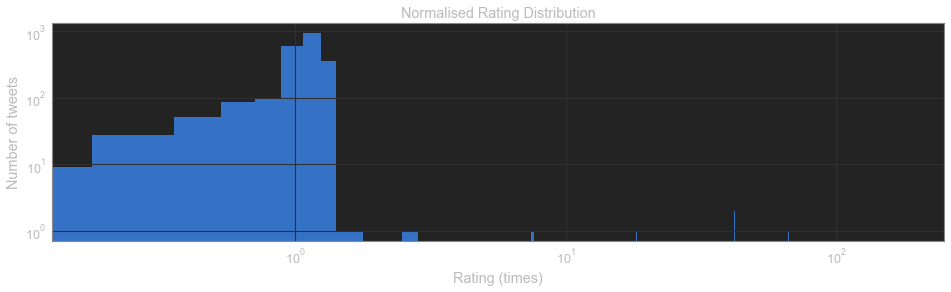

In [62]:
plt.figure(figsize=(16, 4))
ax = plt.subplot(1,1,1)
ax.hist(twitter_archive_clean['rating_normal'], bins = 1000)
ax.set_ylabel('Number of tweets')
ax.set_yscale('log')
ax.set_xlabel('Rating (times)')
ax.set_xscale('log')
ax.set_title('Normalised Rating Distribution')
plt.show()

Based on the above, it can be seen that the vast majority of ratings are at around 100%, with some extremely high "outlier" values, with maximum of 17700% as discussed earlier. There appears to be no negative ratings so the minimum value is 0%.

##### 5. Creating usable image recognition column

The image recognition results give 3 results in order of confidence. The key issues in using the information is 1) many of the results are not for dog breeds and 2) some of the results do not have enough confidence to be meaningful.

Regarding the second point, inspect visually from samples what is the confidence level around which we can be reasonably confident that the recognition algorithm arrived at the correct result

###### Define:

- Copy image prediction dataframe for cleaning
- Create 10 bins based on confidence level

###### Code:

In [63]:
# Create clean image prediction df for cleaning
img_predictions_clean = img_predictions.copy()

In [64]:
# Create bins based on the first result in tenths of the confidence values
bin_edges = np.arange(0, 1.1, 0.1)
bin_names = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5',
             '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
img_predictions_clean['bin'] = pd.cut(
    img_predictions_clean['p1_conf'], bin_edges, labels=bin_names)
img_predictions_clean.groupby('bin').count()['tweet_id']

bin
0.0-0.1     23
0.1-0.2    141
0.2-0.3    205
0.3-0.4    251
0.4-0.5    216
0.5-0.6    222
0.6-0.7    184
0.7-0.8    209
0.8-0.9    228
0.9-1.0    396
Name: tweet_id, dtype: int64

###### Test:

Let us take a sample from the 0.5-0.6 confidence to see how well the recognition algorithm performed:

In [65]:
# Select 10 samples, using fixed random state
img_predictions_clean.query('bin == "0.5-0.6"').sample(10, random_state=1)[
    ['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog']]

,tweet_id,jpg_url,p1,p1_conf,p1_dog
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,loupe,0.546856,False
362,672834301050937345,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,Pembroke,0.582560,True
963,705975130514706432,https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg,Staffordshire_bullterrier,0.587764,True
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,Cardigan,0.566911,True
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,kelpie,0.537782,True
1235,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,toy_poodle,0.508292,True
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,snorkel,0.504983,False
428,674262580978937856,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,Greater_Swiss_Mountain_dog,0.519428,True
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,web_site,0.550294,False
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,Lhasa,0.582330,True


Based on the above sample:
- 812503143955202048 - incorrect, non-dog
- 672834301050937345 - correct dog breed identified
- 705975130514706432 - correct dog breed identified 
- 742385895052087300 - dog but wrong breed
- 684188786104872960 - dog but wrong breed
- 746507379341139972 - dog but wrong breed
- 812503143955202048 - incorrect, non-dog
- 674262580978937856 - dog but wrong breed
- 705786532653883392 - incorrect, non-dog
- 666099513787052032 - correct dog breed identified 

While this is a small sample, 3 out of 10 correct does not seem sufficient. Ignoring non-dog results, the result is still 3 correct out of 7. Next, explore a higher bin of confidence level:

In [66]:
img_predictions_clean.query('bin == "0.6-0.7"').sample(10, random_state=1)[
    ['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog']]

,tweet_id,jpg_url,p1,p1_conf,p1_dog
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,toy_poodle,0.623685,True
1698,816816676327063552,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,malamute,0.668164,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,four-poster,0.696423,False
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,Border_collie,0.663138,True
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,beagle,0.681218,True
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,golden_retriever,0.678555,True
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,Japanese_spaniel,0.661178,True
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,water_bottle,0.614536,False
71,667200525029539841,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,Siberian_husky,0.694904,True
418,674036086168010753,https://pbs.twimg.com/media/CVqoPslWEAEk7EC.jpg,toy_poodle,0.685617,True


Based on the above sample:
- 669564461267722241 - correct dog breed identified
- 816816676327063552 - correct dog breed identified
- 706593038911545345 - no dog detected
- 835172783151792128 - dog but appears to be wrong breed
- 675798442703122432 - appears to be correct breed
- 756998049151549440 - correct dog breed identified
- 677301033169788928 - correct dog breed identified
- 673700254269775872 - incorrect, non-dog
- 667200525029539841 - correct dog breed identified
- 674036086168010753 - correct dog breed identified

For confidence level of 0.6-0.7, the identified dog breed from the sample appear to be mostly correct. As such, for this analysis, it is assumed that a confidence level of 0.6 and above is sufficient.

Next, a usable column of dog breeds for analysis is created:

###### Define:

- Fill column with dog breeds from p1 if confidence level is higher than 0.6
- If p1 result is not a dog breed, fill with p2 result if p2 result is a dog breed with confidence level higher than 0.6
- Repeat with p3 if p2 result not applicable

###### Code:

In [67]:
# For each row, check if p1 meets condition, otherwise check p2 and p3, consecutively
for index, row in img_predictions_clean.iterrows():
    for i in ['1', '2', '3']:
        if row['p' + i + '_dog'] == True:
            if row['p' + i + '_conf'] >= 0.6:
                img_predictions_clean.loc[index, 'dog_breed'] = row['p' + i]

###### Test:

Inspect a sample of the rows of dog breeds to check if the function has recorded them correctly. The recorded breeds should be those with confidence higher than 0.6:

In [68]:
img_predictions_clean[~img_predictions_clean['dog_breed'].isna()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,bin,dog_breed
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,0.6-0.7,Bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,0.6-0.7,chow
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,0.7-0.8,golden_retriever
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,0.8-0.9,Maltese_dog
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True,0.8-0.9,golden_retriever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,0.9-1.0,golden_retriever
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,0.9-1.0,French_bulldog
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,0.9-1.0,Pembroke
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,0.9-1.0,Samoyed


From this, it can be seen that there are 795 rows of usable image prediction data. 

In [69]:
img_predictions_clean.groupby('dog_breed')['tweet_id'].count().sort_values(ascending=False).head(10)

dog_breed
golden_retriever      114
Labrador_retriever     61
Pembroke               60
Chihuahua              42
pug                    40
Samoyed                27
Pomeranian             26
French_bulldog         22
chow                   21
toy_poodle             20
Name: tweet_id, dtype: int64

The above are the 10 most popular identified dog breeds.

##### 6. Joining dataframes into single dataframe for analysis

Since all the data is based on a single observable unit (tweets), the dataframes should be merged together including the data that will be used for analysis. 

###### Define:

- Left-join twitter_archive_clean dataframe with the relevant columns (image url and the identified dog breed column generated earlier) from the img_prediction_clean dataframe on tweet_id
- Left-join above dataframe with relevant columns from tweets_from_api (favourite and retweet counts) on tweet_id
- Drop unwanted columns, in this case the "id" column from tweets_from_api

###### Code:

In [70]:
df1 = pd.merge(twitter_archive_clean, img_predictions_clean[['tweet_id', 'jpg_url', 'dog_breed']],
               how='left', left_on='tweet_id', right_on='tweet_id')

df = pd.merge(df1, tweets_from_api[['id', 'retweet_count', 'favorite_count']],
              how='left', left_on='tweet_id', right_on='id')

In [71]:
df = df.drop(columns='id')

###### Test:

Check info and description of new master dataframe:

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2170 non-null   int64              
 1   in_reply_to_status_id  75 non-null     float64            
 2   in_reply_to_user_id    75 non-null     float64            
 3   timestamp              2170 non-null   datetime64[ns, UTC]
 4   source                 2170 non-null   object             
 5   text                   2170 non-null   object             
 6   expanded_urls          2115 non-null   object             
 7   rating_numerator       2170 non-null   int64              
 8   rating_denominator     2170 non-null   int64              
 9   name                   1390 non-null   object             
 10  dog_stage              2170 non-null   object             
 11  rating_normal          2170 non-null   float64          

In [73]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,rating_normal,retweet_count,favorite_count
count,2.170000e+03,7.500000e+01,7.500000e+01,2170.000000,2170.000000,2170.000000,2163.000000,2163.000000
mean,7.370454e+17,7.439500e+17,2.094737e+16,12.720737,10.427189,1.224041,2363.761905,7902.754508
std,6.746362e+16,7.564471e+16,1.277269e+17,43.165772,6.626469,4.251215,4203.529328,11640.939079
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,10.000000,0.000000,1.000000,47.000000
25%,6.768202e+17,6.756022e+17,4.130047e+08,10.000000,10.000000,1.000000,510.000000,1676.000000
50%,7.097095e+17,7.032559e+17,4.196984e+09,11.000000,10.000000,1.100000,1124.000000,3567.000000
75%,7.892358e+17,8.222395e+17,4.196984e+09,12.000000,10.000000,1.200000,2693.000000,9798.500000
max,8.924206e+17,8.862664e+17,8.405479e+17,1776.000000,170.000000,177.600000,74854.000000,151150.000000


## Analyzing and Visualizing Data

In order to give a quick glance of any potentially interesting data, a scatter matrix of numerical data is ploted:

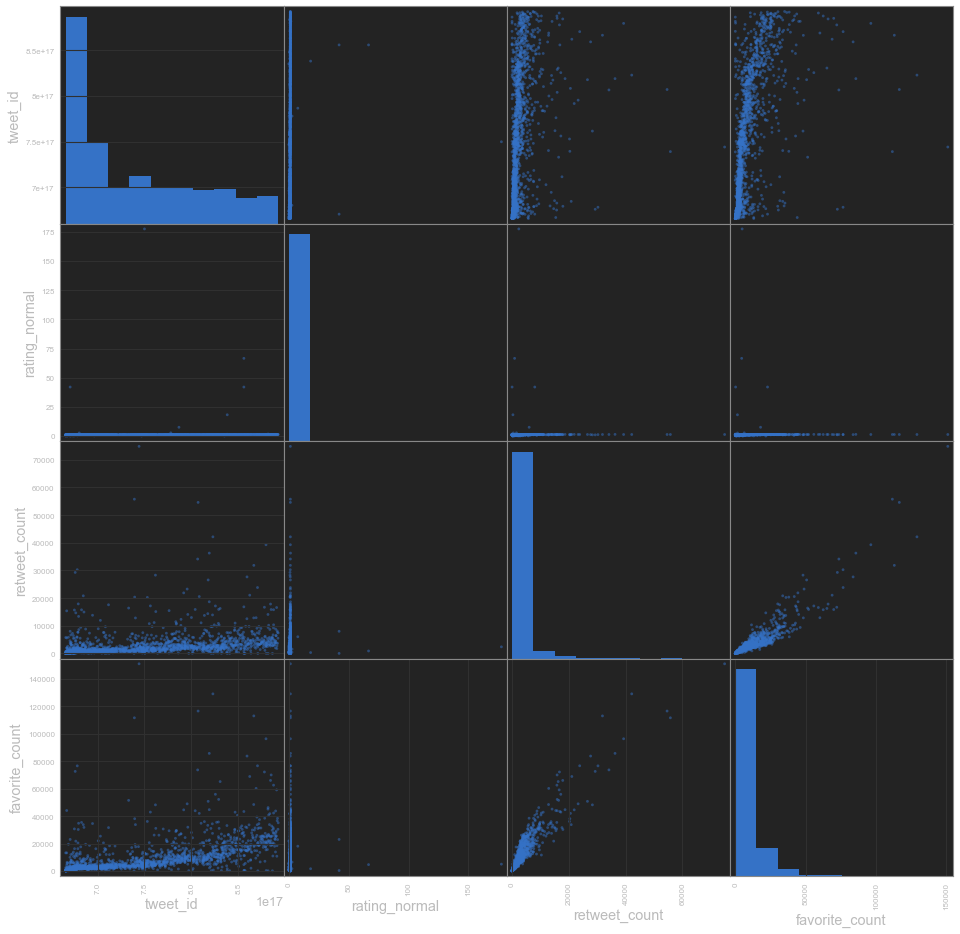

In [74]:
pd.plotting.scatter_matrix(df[['tweet_id', 'rating_normal', 'retweet_count', 'favorite_count']], 
                           figsize=[16,16])
plt.show()

From the scatter matrix, some immediatel observable trends are as follows:

- Retweet and favourite counts appear to have a direct positive relationship, which would be expected since more popular tweets should get both more retweets and favourites
- Number of retweets and favourites seems to have some positive correlation with tweet id. It can be observed that newer ids have greater values, since the tweet id also includes a timestamp (https://developer.twitter.com/en/docs/twitter-ids), so this implies that newer tweets tend to be have more likes and retweets, which implies that the WeRateDogs account is becoming more popular as newer tweets tend to have more engagements.

### Popularity and Trends over Time

For the first analysis, investigate how the activity and popularity of the WeRateDogs page and any if there are any trends over time related to its ratings and other quantifiable matrices.

Since data from November 2015 to August 2017 are available, tweets are grouped by month:

In [75]:
# Create year-month bin column
df['year_month'] = df['timestamp'].dt.strftime('%Y-%m')

In [76]:
# Create bin list for box plot (flip to arrange oldest to newest)
bin_list = np.flip(df['year_month'].unique())

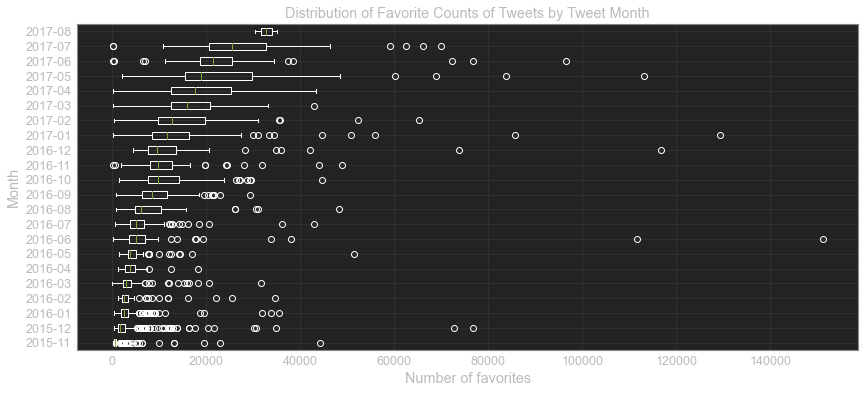

In [77]:
# Create box plot to investigate distribution of favourite count
fig = plt.figure(figsize=(14, 6))

def box_plots(column, median_hilight=False):
    ax = plt.subplot(1, 1, 1)
    # Set outlier dots to white for dark background
    flierprops = dict(markeredgecolor='white')
    box_data = []

    for i, j in enumerate(bin_list):
        query_string = 'year_month' + ' == "' + j + '"'
        data = df.query(query_string)[column] 
        data = data.dropna()
        box_data.append(data)

    bp = ax.boxplot(box_data, flierprops=flierprops, vert=False)

    # Set to white for dark background
    for key in ['boxes', 'whiskers', 'caps']:
        plt.setp(bp[key], color='white')
    
    # In case default median line colour is hard to see, set to blue
    if median_hilight:
        plt.setp(bp['medians'], color='blue', linewidth=2)

    return ax 

ax = box_plots('favorite_count')
ax.set_yticklabels(bin_list)
ax.set_xlabel('Number of favorites')
ax.set_ylabel('Month')
ax.set_title('Distribution of Favorite Counts of Tweets by Tweet Month')

plt.show()

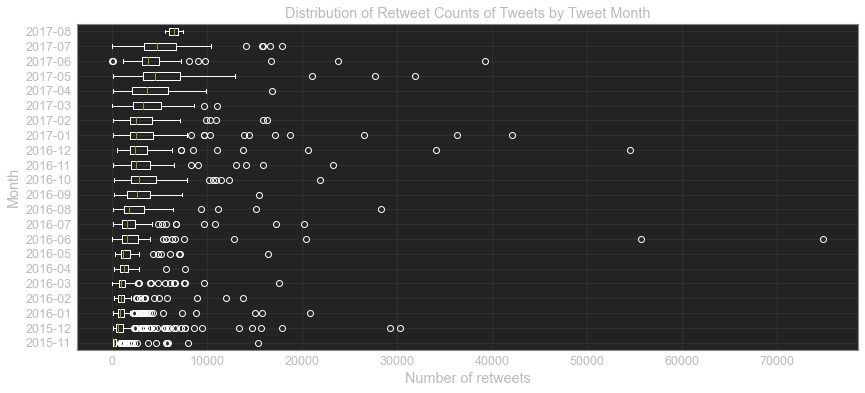

In [78]:
fig = plt.figure(figsize=(14, 6))
ax = box_plots('retweet_count')
ax.set_yticklabels(bin_list)
ax.set_xlabel('Number of retweets')
ax.set_ylabel('Month')
ax.set_title('Distribution of Retweet Counts of Tweets by Tweet Month')

plt.show()

Based on the above distributions, it can be seen that there is a signicant amount of outlier values in distribution of favourite and retweet count values. Thus, the most appropriate metric to use to find the average favourite and retweet amount would be the median value.

Following from this, plot the number of tweets by WeRateDogs account and average favourite and retweet counts over time are plotted:

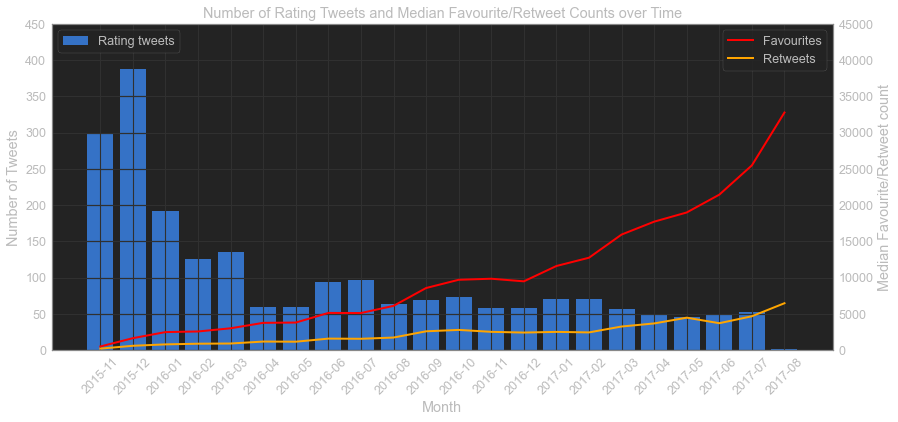

In [79]:
fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 1, 1)
# Create bar chart of tweet counts on primary y-axis
ax1.bar(bin_list, df.groupby('year_month')['tweet_id'].count(), label='Rating tweets')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
ax1.set_ylim(0, 450)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Tweets')
ax1.set_title('Number of Rating Tweets and Median Favourite/Retweet Counts over Time')

# Create line charts of avg engagement metrics on secondary y-axis
ax2 = ax1.twinx()

ax2.plot(bin_list, df.groupby('year_month')['favorite_count'].median(), 
         label='Favourites', color='red', linewidth=2)
ax2.plot(bin_list, df.groupby('year_month')['retweet_count'].median(), 
         label='Retweets', color='orange', linewidth=2)
plt.legend(loc='upper right')
ax2.set_ylim(0, 45000)
ax2.set_ylabel('Median Favourite/Retweet count')

plt.show()

Based on the above, it can be seen that in the first 2 months of the WeRateDogs account's creation, the number of rating tweets made was the highest, peaking at close to 400 tweets in Dec 2015. In the first 3 months of 2016, it can be seen that the number of rating tweets decreased significantly. In April and May 2016, it appeared that the account made around 60 rating posts per month, and in the next 2 months, it made close to a hundred rating posts per months. From August 2016 to March 2017, the account appeared to settle at making around 60-75 rating posts per month. From April 2017 onwards, the average rating posts per month appears to reduce further to approximately 50.

On the other hand, the average engagement per rating post both in terms of number of favourites and retweets have trended up on average. While this could be explained by the account becoming more popular and gaining more followers, the account owner may also have decided that making less posts on average are more likely to result in better engagement per post.

Next, investigate whether if or how the ratings the account gives to dogs have changed:

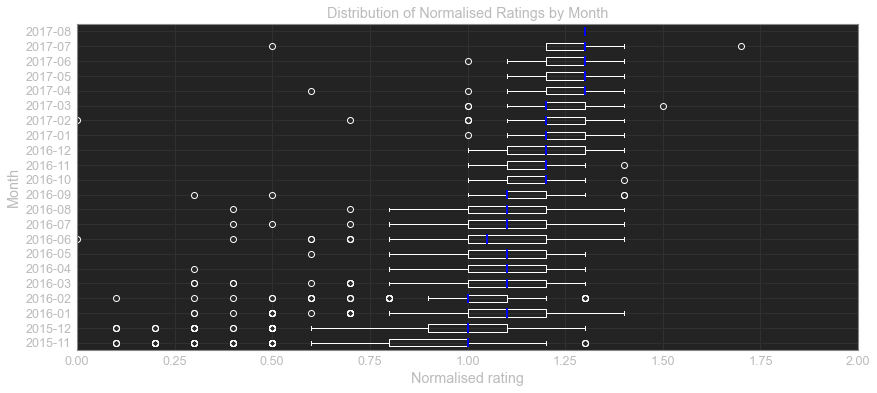

In [80]:
fig = plt.figure(figsize=(14, 6))
ax = box_plots('rating_normal', median_hilight=True)
ax.set_yticklabels(bin_list)
ax.set_xlabel('Normalised rating')
ax.set_ylabel('Month')
ax.set_xlim(0, 2)
ax.set_title('Distribution of Normalised Ratings by Month')

plt.show()

_Note: above plot's limit set at 2.0 so high outliers are not included in the plot_

It can be seen in the above plot that the median rating appears to increase over time. When the account was started, the median normalised rating was at 1.0. In 2016, the median rating went up to approx. 1.1 for most months. Around the end of 2016, median rating went up to 1.2, and in mid-2017, median rating increased again to 1.3.

This may be explained by a more generous rating scheme overall as time passes, or it could correlate to the fact that the account makes less ratings in later months than in earlier months - perhaps the tweets are more strictly curated with less lower rating dogs being posted.

Next, investigate if there are more usage of dog stage terms (doggo, pupper, puppo and floofer) over time:

In [81]:
# Explode master dataframe on dog_stage column to expand multiple dog stage rows
df_dog_stage = df.copy()
df_dog_stage['dog_stage'] = df_dog_stage['dog_stage'].str.split(pat='|')
df_dog_stage = df_dog_stage.explode('dog_stage')

In [82]:
# Create dataframe with counts of dog stage terms used as well as total rating tweet counts for comparison
dog_stage_freq = df_dog_stage.groupby('year_month')['tweet_id'].count().reset_index()
dog_stage_freq = dog_stage_freq.rename(columns={'tweet_id': 'tweet_count'})

for stage in dog_stages:
    for index, row in dog_stage_freq.iterrows():
        query_string = '(year_month == "' + row['year_month'] + '") and (dog_stage == "' + stage + '")'
        dog_stage_freq.loc[index, stage] = df_dog_stage.query(query_string)['tweet_id'].count()

In [83]:
# Create column with percentage usage
for column in dog_stages:
    dog_stage_freq[column + '_percent'] = dog_stage_freq[column] / \
        dog_stage_freq['tweet_count']

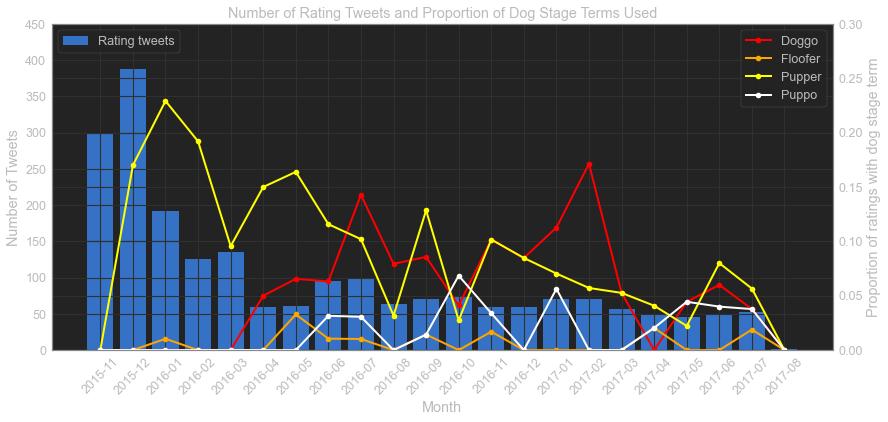

In [84]:
fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 1, 1)
# Bar chart with tweet counts on primary y-axis
ax1.bar(bin_list, dog_stage_freq['tweet_count'], label='Rating tweets')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
ax1.set_ylim(0, 450)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Tweets')
ax1.set_title('Number of Rating Tweets and Proportion of Dog Stage Terms Used')

# Line charts with dog stage term usage percentages on secondary y-axis
ax2 = ax1.twinx()

ax2.plot(bin_list, dog_stage_freq['doggo_percent'],
         label='Doggo', color='red', linewidth=2, marker='o')
ax2.plot(bin_list, dog_stage_freq['floofer_percent'],
         label='Floofer', color='orange', linewidth=2, marker='o')
ax2.plot(bin_list, dog_stage_freq['pupper_percent'],
         label='Pupper', color='yellow', linewidth=2, marker='o')
ax2.plot(bin_list, dog_stage_freq['puppo_percent'],
         label='Puppo', color='white', linewidth=2, marker='o')
plt.legend(loc='upper right')
ax2.set_ylim(0, 0.3)
ax2.set_ylabel('Proportion of ratings with dog stage term')

plt.show()

Based on the above plot, in the first month, none of the terms were used at all. From the second month onwards "pupper" was used the most often in the first few months, accounting for around 10-25% of all rating tweets made. In later months it dropped in frequency while the other 3 terms became more frequent.

"Doggo" started to be used in April 2016 and remained popular, exceeding "pupper" in some months in 2016 and 2017. Both pupper and doggo remain frequent throughout 2016 and 2017 with around 5-15% of tweets containing the terms in most months.

"Floofer" and "puppo" are not as frequent, with their usage most months not exceeding 5%. However, puppo do gain frequency spikes in certain months where it exceeds doggo and pupper usages, including in October 2016 and May 2017. Floofer, on the other hand, has never been used more frequentyly than doggo or pupper in any single month.

### Relationship between Rating Score and Engagement

Next, investigate whether the "official" rating given by the WeRateDogs account has any relationship to how popular the tweet is. For this, since it was established that retweets and favorite counts are positively correlated, use the favourite count only to determine the tweet's popularity:

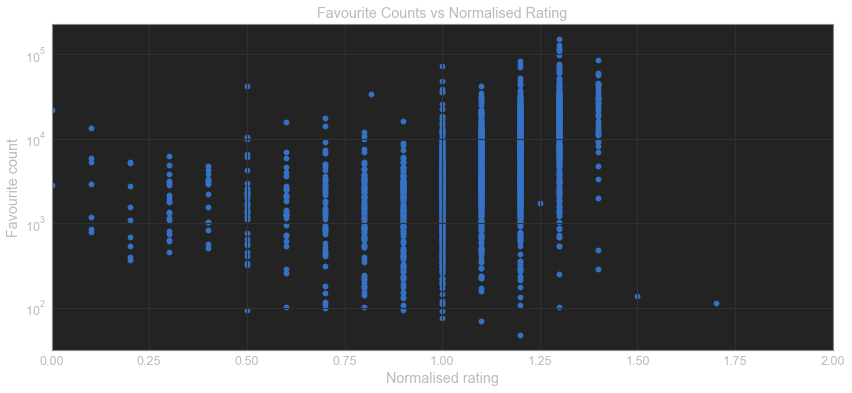

In [85]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
ax.scatter(df['rating_normal'], df['favorite_count'])
ax.set_xlim(0,2)
ax.set_yscale('log')
ax.set_ylabel('Favourite count')
ax.set_xlabel('Normalised rating')
ax.set_title('Favourite Counts vs Normalised Rating')

plt.show()

Based on visual inspection, it does appear that , for ratings of 1.0 onwards, there is a positive correlation between rating given and popularity of a tweet. For ratings lower than 1.0, there does not seem to be a significant trend.

However, it was observed in the previous section that there is a positive shift in average rating over time (newer ratings tend to be higher than older ratings), as well as a positive shift in average favourites per tweet over time, which may have caused the relationships observed above. 

In order to minimise the temporal effect, look at the relationships separately for different time windows. For this, the time window is separated to 4 periods:
- 2015 (including Nov - Dec)
- 1st half of 2016
- 2nd half of 2016
- 2017 up to April

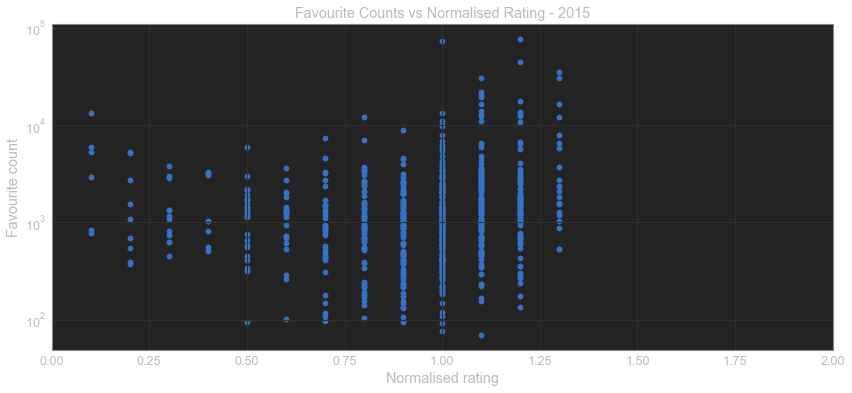

In [86]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
ax.scatter(df[(df['timestamp'] > '2015-1-1') & (df['timestamp'] <= '2016-1-1')]['rating_normal'], 
           df[(df['timestamp'] > '2015-1-1') & (df['timestamp'] <= '2016-1-1')]['favorite_count'])
ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Favourite count')
ax.set_xlabel('Normalised rating')
ax.set_title('Favourite Counts vs Normalised Rating - 2015')

plt.show()

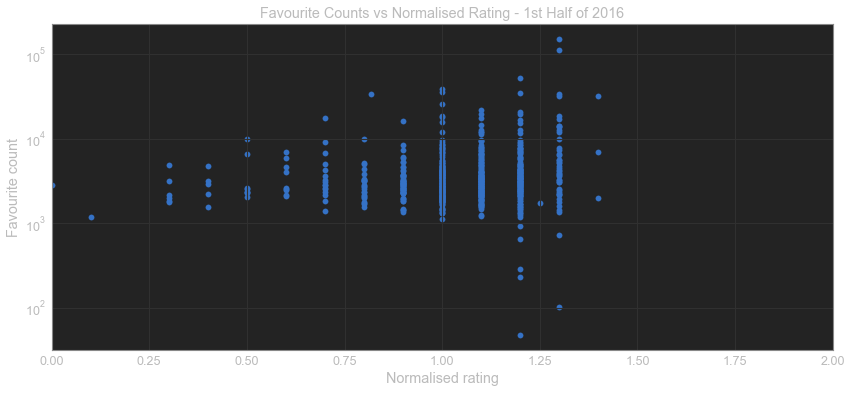

In [87]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
ax.scatter(df[(df['timestamp'] > '2016-1-1') & (df['timestamp'] <= '2016-7-1')]['rating_normal'], 
           df[(df['timestamp'] > '2016-1-1') & (df['timestamp'] <= '2016-7-1')]['favorite_count'])
ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Favourite count')
ax.set_xlabel('Normalised rating')
ax.set_title('Favourite Counts vs Normalised Rating - 1st Half of 2016')

plt.show()

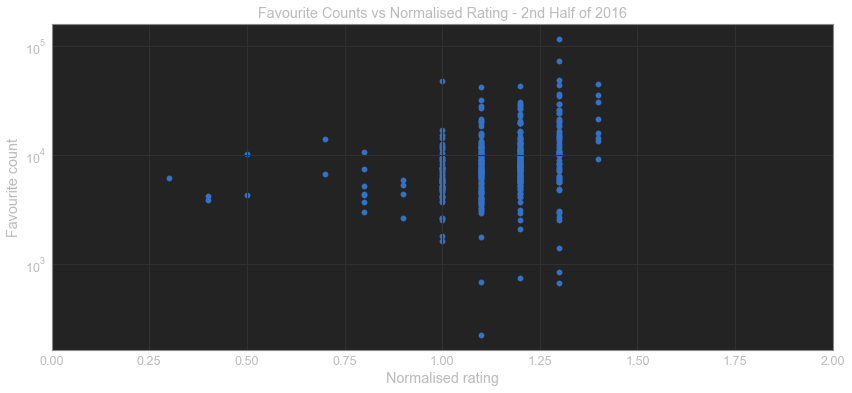

In [88]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
ax.scatter(df[(df['timestamp'] > '2016-7-1') & (df['timestamp'] <= '2017-1-1')]['rating_normal'], 
           df[(df['timestamp'] > '2016-7-1') & (df['timestamp'] <= '2017-1-1')]['favorite_count'])
ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Favourite count')
ax.set_xlabel('Normalised rating')
ax.set_title('Favourite Counts vs Normalised Rating - 2nd Half of 2016')

plt.show()

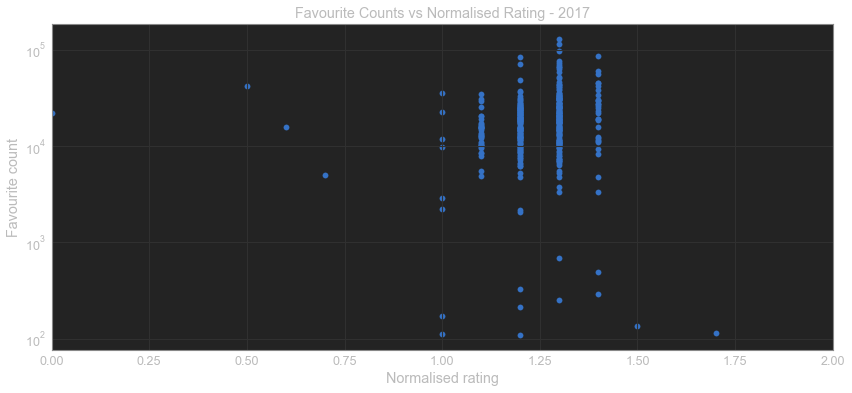

In [89]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
ax.scatter(df[(df['timestamp'] > '2017-1-1')]['rating_normal'], 
           df[(df['timestamp'] > '2017-1-1')]['favorite_count'])
ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Favourite count')
ax.set_xlabel('Normalised rating')
ax.set_title('Favourite Counts vs Normalised Rating - 2017')

plt.show()

Based on visual inspections the above, it does appear that the previously observed relationships do hold for most of the time windows observed (apart from 1st half of 2016 where there does not appear to be a significant trend). A potential explanation is that viewers are more likely to be interested in dogs with very high ratings (above 1.0 normalised value), resulting in higher engagement, compared to more "normal" values lower than 1.0.

### Relationship between Dog Stages Terms, Rating and Engagement

Next, investigate whether rating tweets made where the dog stage (doggo, floofer, pupper and puppo) are used perform differently to tweets which do not have dog stage terms:

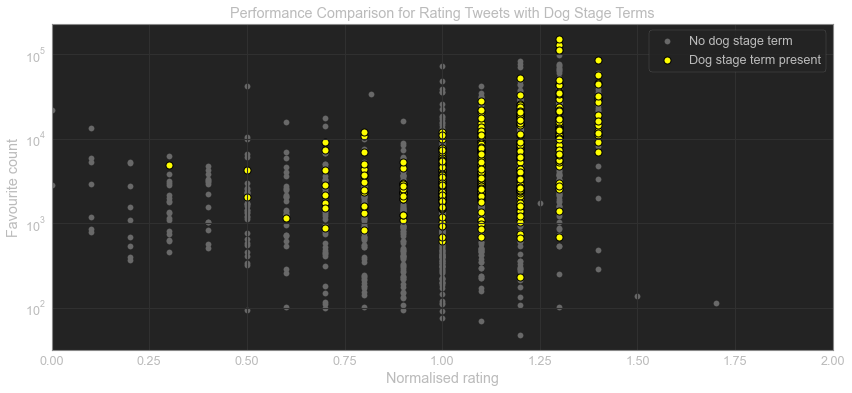

In [90]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
ax.scatter(df['rating_normal'], df['favorite_count'], color='dimgrey',
           label='No dog stage term')
ax.set_xlim(0,2)
ax.set_yscale('log')
ax.set_ylabel('Favourite count')
ax.set_xlabel('Normalised rating')
ax.set_title('Performance Comparison for Rating Tweets with Dog Stage Terms')

df_with_stages = df[~(df['dog_stage'] == "")]

ax.scatter(df_with_stages['rating_normal'], df_with_stages['favorite_count'], 
           color='yellow', edgecolors='black', linewidths=1, s=50, 
           label='Dog stage term present')

plt.legend()
plt.show()

As seen in the above plot, the highlighted tweets with dog stage terms appear to outperform those without on average, both in terms of ratings and user engagement. However, this may be a temporal effect of change in usages of dog stage terms over time, which we will explore in more details later.

Next, explore if the average ratings and favourite count of each term is different:

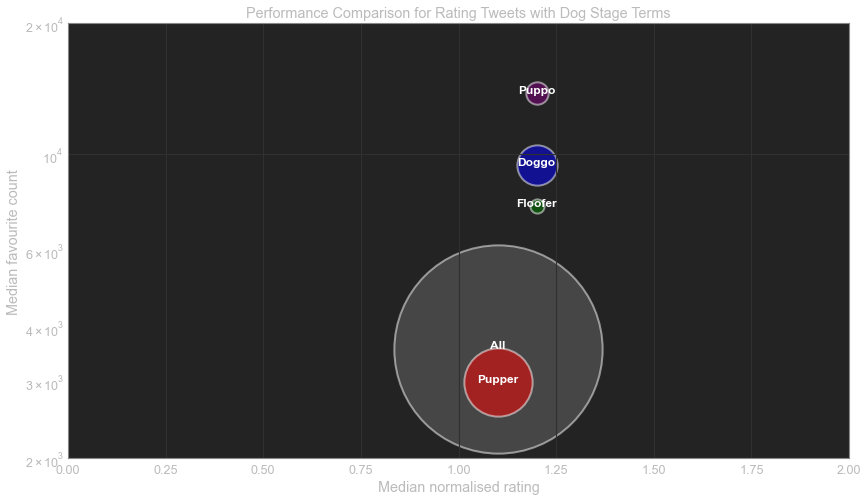

In [91]:
# Define function to generate xyz values for the bubble plot
def dog_stage_xyz_gen(df):
    x = [df['rating_normal'].median()]
    for stage in dog_stages:
        query_string = 'dog_stage == "' + stage + '"'
        median = df.query(query_string)['rating_normal'].median()
        x = np.append(x, median)

    y = [df['favorite_count'].median()]
    for stage in dog_stages:
        query_string = 'dog_stage == "' + stage + '"'
        median = df.query(query_string)['favorite_count'].median()
        y = np.append(y, median)

    z = [df['favorite_count'].count()]
    for stage in dog_stages:
        query_string = 'dog_stage == "' + stage + '"'
        median = df.query(query_string)['favorite_count'].count()
        z = np.append(z, median)

    return x, y, z


x, y, z = dog_stage_xyz_gen(df_dog_stage)

# Define colours for bubble plots
color_list = ['dimgrey', 'blue', 'green', 'red', 'purple']

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

# Iterate over xyz values for All and each of the 4 dog stage terms
# z size multiplied by 20 to get a "good" size
for i in range(0, 5):
    ax.scatter(x[i], y[i], s=z[i]*20, color=color_list[i],
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_ylim(2000, 20000)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Rating Tweets with Dog Stage Terms')

labels = ['All', 'Doggo', 'Floofer', 'Pupper', 'Puppo']

# Get location of each bubble and add label
for line in range(0, 5):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

Plotting the average ratings and favourite counts of each dog stage term used compared to all rating tweets (size of bubble indicates amount of tweets), it appears that while puppo, doggo and floofer tend to get slightly higher rating and significantly more engagement, pupper actually underperforms the average in terms of engagement.

However, it should be noted that that pupper was heavily used during the earlier days of the account's activity, where both engagement and ratings were lower on average. As such, investigate the above based on smaller time windows, similarly to the previous section:

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


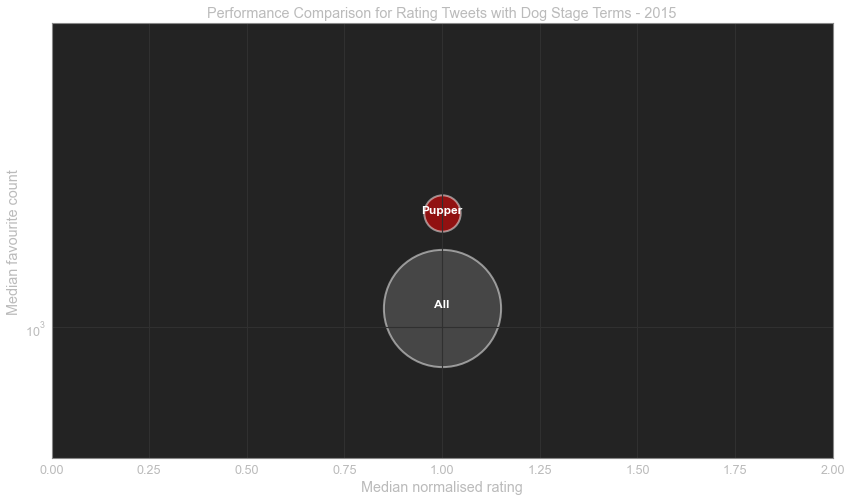

In [92]:
x, y, z = dog_stage_xyz_gen(
    df_dog_stage[(df_dog_stage['timestamp'] > '2015-1-1') & 
                 (df_dog_stage['timestamp'] <= '2016-1-1')])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

for i in range(0, 5):
    ax.scatter(x[i], y[i], s=z[i]*20, color=color_list[i],
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_ylim(500, 5000)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Rating Tweets with Dog Stage Terms - 2015')

for line in range(0, 5):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

posx and posy should be finite values
posx and posy should be finite values


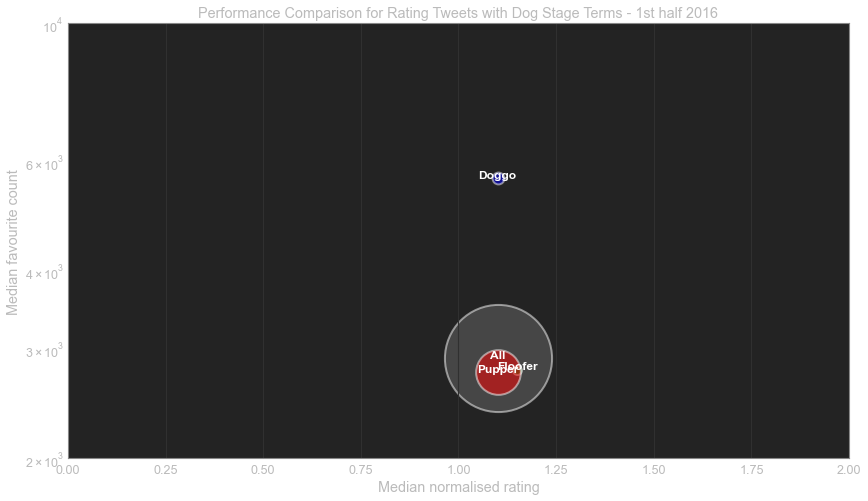

In [93]:
x, y, z = dog_stage_xyz_gen(
    df_dog_stage[(df_dog_stage['timestamp'] > '2016-1-1') & 
                 (df_dog_stage['timestamp'] <= '2016-6-1')])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

for i in range(0, 5):
    ax.scatter(x[i], y[i], s=z[i]*20, color=color_list[i],
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_ylim(2000, 10000)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Rating Tweets with Dog Stage Terms - 1st half 2016')

for line in range(0, 5):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

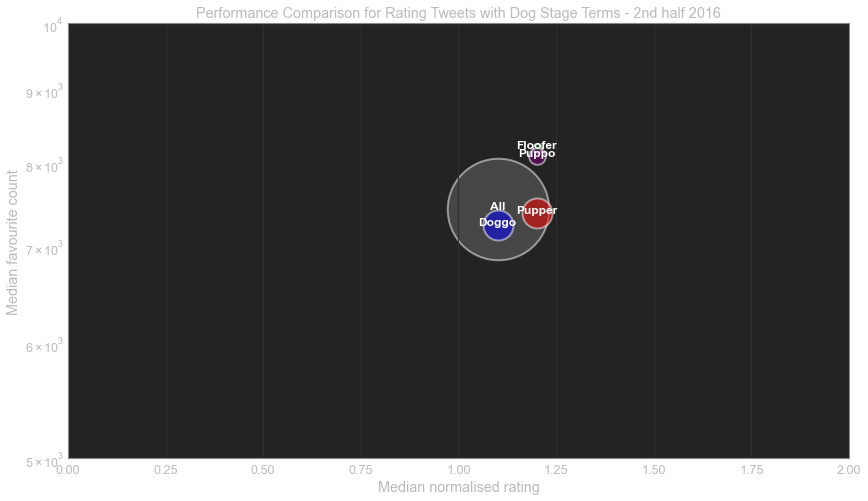

In [94]:
x, y, z = dog_stage_xyz_gen(
    df_dog_stage[(df_dog_stage['timestamp'] > '2016-6-1') & 
                 (df_dog_stage['timestamp'] <= '2017-1-1')])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

for i in range(0, 5):
    ax.scatter(x[i], y[i], s=z[i]*20, color=color_list[i],
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_ylim(5000, 10000)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Rating Tweets with Dog Stage Terms - 2nd half 2016')

for line in range(0, 5):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

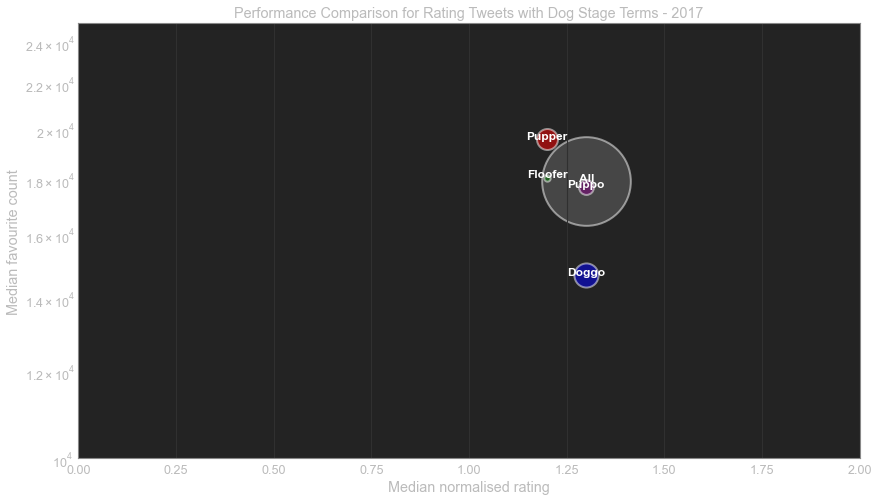

In [95]:
x, y, z = dog_stage_xyz_gen(
    df_dog_stage[(df_dog_stage['timestamp'] > '2017-1-1') & 
                 (df_dog_stage['timestamp'] <= '2018-1-1')])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

for i in range(0, 5):
    ax.scatter(x[i], y[i], s=z[i]*20, color=color_list[i],
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_ylim(10000, 25000)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Rating Tweets with Dog Stage Terms - 2017')

for line in range(0, 5):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

As seen from the above 4 charts with 4 time periods, while each term performs slightly differently to the average over each period, there is no particular term that consistently outperform or overperform the average from period to period. As such, it could be concluded that the dog stage terms do not have any signifcant relationship with rating or engagement.

### Relationship between Dog Breed, Rating and Engagement

In this section, investigate dog breed which has been sufficiently confidently identified and their ratings and user engagement.

As there are 94 identified breeds, the analysis will concentrate on top breeds only for analysis:

In [96]:
df['dog_breed'].nunique()

94

In [97]:
breed_count = df.groupby('dog_breed')['tweet_id'].count(
    ).sort_values(ascending=False).reset_index()
breed_count.rename(columns={'tweet_id': 'count'}, inplace=True)
breed_count

,dog_breed,count
0,golden_retriever,104
1,Pembroke,59
2,Labrador_retriever,57
3,Chihuahua,40
4,pug,38
...,...,...
89,Japanese_spaniel,1
90,Tibetan_terrier,1
91,Greater_Swiss_Mountain_dog,1
92,Gordon_setter,1


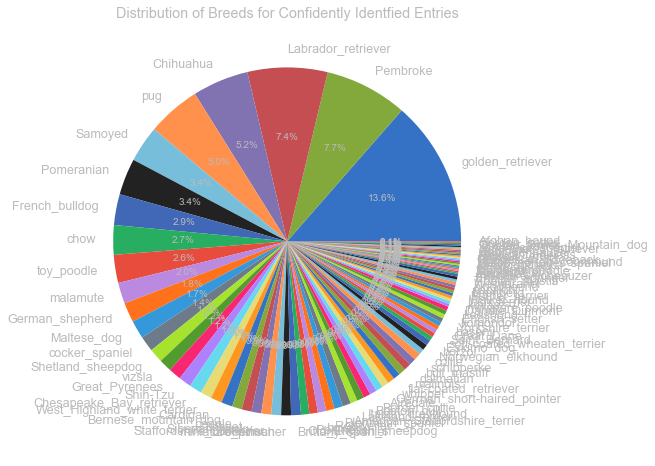

In [98]:
fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)
ax.pie(breed_count['count'], labels=breed_count['dog_breed'], autopct='%1.1f%%')
ax.set_title('Distribution of Breeds for Confidently Identfied Entries')
plt.show()

Based on the above, it can be seen that the distribution of identified breeds is quite diverse, with the most prolific breed being golden retriever, making up 13.6% of identified breeds, followed by Pembroke and labrador retriever. Due to a large amount of breeds, the analysis focus only on the top 15 breeds for analysis:

In [99]:
# Take top 15 breeds and record sum of other identified breeds
breed_count_top = breed_count.head(15)
other_breeds_count = breed_count['count'].sum() - breed_count_top['count'].sum()

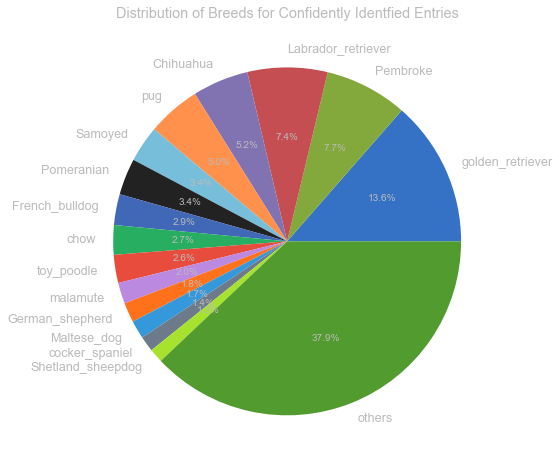

In [100]:
fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)
ax.pie(np.append(breed_count_top['count'], other_breeds_count),
       labels=np.append(breed_count_top['dog_breed'], 'others'), autopct='%1.1f%%')
ax.set_title('Distribution of Breeds for Confidently Identfied Entries')
plt.show()

Next, explore how these dog breeds perform in terms of ratings and engagement:

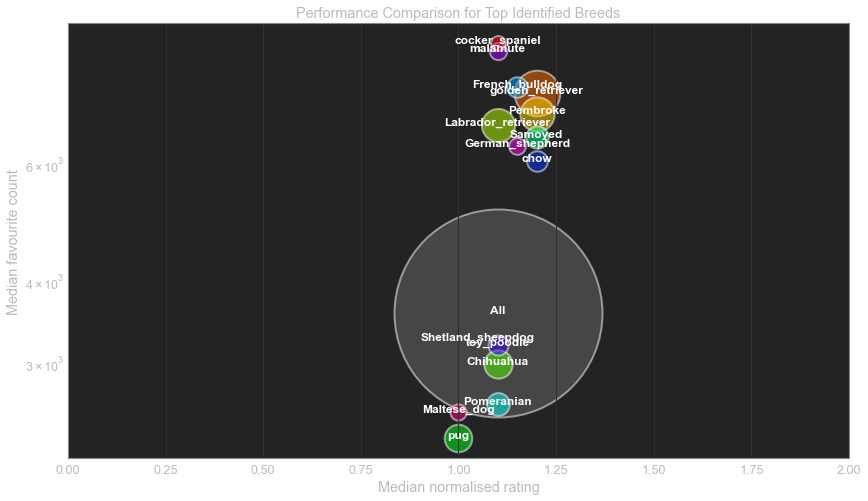

In [101]:
# Generate xyz for All and each dog breed
def dog_breed_xyz_gen(df, breed_list):
    x = [df['rating_normal'].median()]
    for breed in breed_list:
        query_string = 'dog_breed == "' + breed + '"'
        median = df.query(query_string)['rating_normal'].median()
        x = np.append(x, median)

    y = [df['favorite_count'].median()]
    for breed in breed_list:
        query_string = 'dog_breed == "' + breed + '"'
        median = df.query(query_string)['favorite_count'].median()
        y = np.append(y, median)

    z = [df['favorite_count'].count()]
    for breed in breed_list:
        query_string = 'dog_breed == "' + breed + '"'
        count = df.query(query_string)['favorite_count'].count()
        z = np.append(z, count)

    return x, y, z


x, y, z = dog_breed_xyz_gen(df, breed_count_top['dog_breed'])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

# Generate All bubble in grey
ax.scatter(x[0], y[0], s=z[0]*20, color='dimgrey',
           alpha=0.5, edgecolors='white', linewidths=2)

# Generate each dog breed's bubble iterating over the HSV colour map
for i in range(1, len(x)-1):
    ax.scatter(x[i], y[i], s=z[i]*20, color=plt.cm.get_cmap('hsv', len(x)-1)(i),
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Top Identified Breeds')

labels = np.append('All', breed_count_top['dog_breed'])

for line in range(0, len(x)):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

Based on the above bubble plot, an interesting pattern is seen where there appears to be a group of breed which, on average, significantly overperform the average in terms of user engagement, while another group is close to or underperform the average. There does not seem to be significant difference in ratings for any of the breeds from the overall average.

However, it was observed in previous analyses that the difference in favorite count can be significantly affected by the time which the tweet was made (newer tweets being more popular), so separate the results to 4 separate time windows similarly to the previous section and inspect whether any relationship could be drawn:

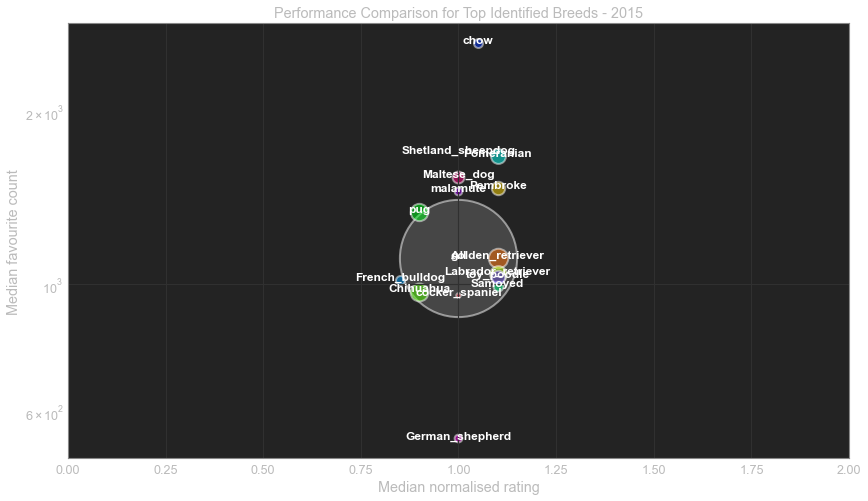

In [102]:
x, y, z = dog_breed_xyz_gen(df[(df['timestamp'] > '2015-1-1') & 
                               (df['timestamp'] <= '2016-1-1')], 
                            breed_count_top['dog_breed'])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

ax.scatter(x[0], y[0], s=z[0]*20, color='dimgrey',
           alpha=0.5, edgecolors='white', linewidths=2)

for i in range(1, len(x)-1):
    ax.scatter(x[i], y[i], s=z[i]*20, color=plt.cm.get_cmap('hsv', len(x)-1)(i),
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Top Identified Breeds - 2015')

labels = np.append('All', breed_count_top['dog_breed'])

for line in range(0, len(x)):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

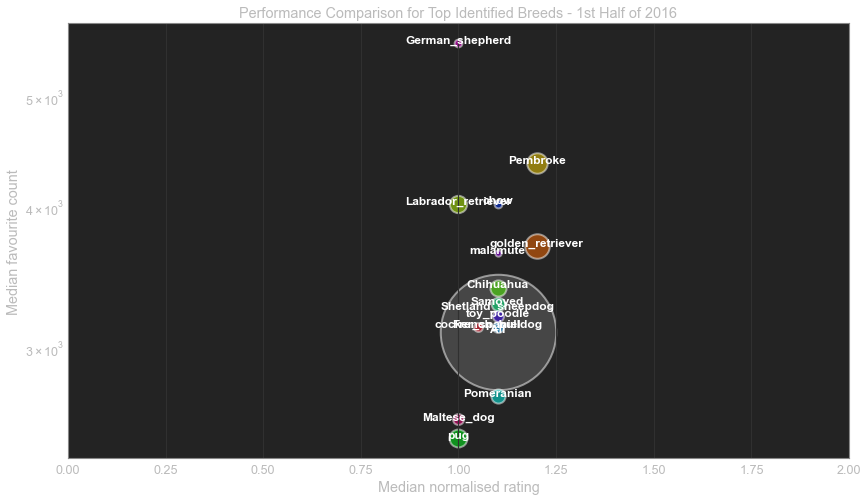

In [103]:
x, y, z = dog_breed_xyz_gen(df[(df['timestamp'] > '2016-1-1') & 
                               (df['timestamp'] <= '2016-7-1')], 
                            breed_count_top['dog_breed'])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

ax.scatter(x[0], y[0], s=z[0]*20, color='dimgrey',
           alpha=0.5, edgecolors='white', linewidths=2)

for i in range(1, len(x)-1):
    ax.scatter(x[i], y[i], s=z[i]*20, color=plt.cm.get_cmap('hsv', len(x)-1)(i),
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Top Identified Breeds - 1st Half of 2016')

labels = np.append('All', breed_count_top['dog_breed'])

for line in range(0, len(x)):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

posx and posy should be finite values
posx and posy should be finite values


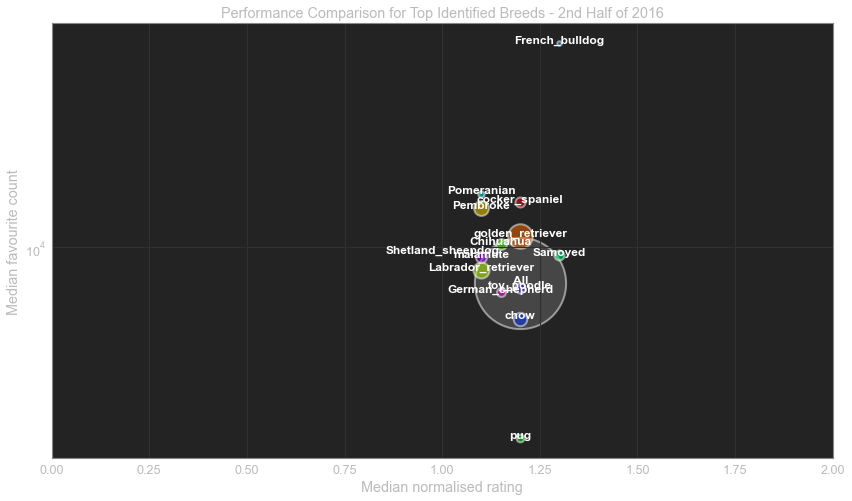

In [104]:
x, y, z = dog_breed_xyz_gen(df[(df['timestamp'] > '2016-7-1') & 
                               (df['timestamp'] <= '2017-1-1')], 
                            breed_count_top['dog_breed'])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

ax.scatter(x[0], y[0], s=z[0]*20, color='dimgrey',
           alpha=0.5, edgecolors='white', linewidths=2)

for i in range(1, len(x)-1):
    ax.scatter(x[i], y[i], s=z[i]*20, color=plt.cm.get_cmap('hsv', len(x)-1)(i),
               alpha=0.5, edgecolors='white', linewidths=2)
    
ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Top Identified Breeds - 2nd Half of 2016')

labels = np.append('All', breed_count_top['dog_breed'])

for line in range(0, len(x)):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


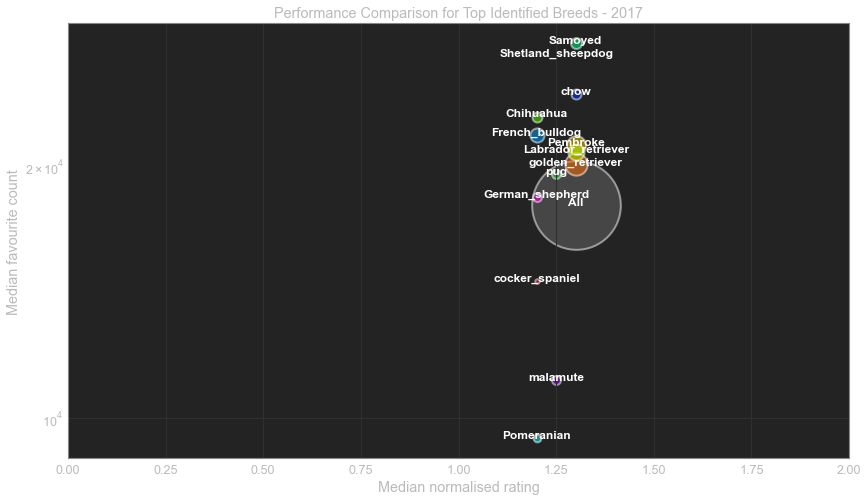

In [105]:
x, y, z = dog_breed_xyz_gen(df[(df['timestamp'] > '2017-1-1') & 
                               (df['timestamp'] <= '2018-1-1')], 
                            breed_count_top['dog_breed'])

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(1, 1, 1)

ax.scatter(x[0], y[0], s=z[0]*20, color='dimgrey',
           alpha=0.5, edgecolors='white', linewidths=2)

for i in range(1, len(x)-1):
    ax.scatter(x[i], y[i], s=z[i]*20, color=plt.cm.get_cmap('hsv', 15)(i),
               alpha=0.5, edgecolors='white', linewidths=2)

ax.set_xlim(0, 2)
ax.set_yscale('log')
ax.set_ylabel('Median favourite count')
ax.set_xlabel('Median normalised rating')
ax.set_title('Performance Comparison for Top Identified Breeds - 2017')

labels = np.append('All', breed_count_top['dog_breed'])

for line in range(0, len(x)):
    ax.text(x[line], y[line], labels[line], horizontalalignment='center',
            size='large', color='white', weight='semibold')

plt.show()

Based on the above observations by time windows, it does appear that, while there is not a large difference in average rating of each breed compared to average rating of all dogs, certain breeds to appear to overperform the average in terms of favourite counts in 3 or 4 out of the 4 time periods, namely:
- Golden retriever (H1/2016, H2/2016 and 2017)
- Pembroke (all periods)
- Labrador retriever (H1/2016, H2/2016 and 2017)
- Chihuahua (H1/2016, H2/2016 and 2017)
- Samoyed (H1/2016, H2/2016 and 2017)
- Chow (2015, H1/2016 and 2017)
- Shetland sheepdog (all periods)

Thus, it could be argued that the above breeds are popular among viewers that they can overperform the average over a longer time period.

In [106]:
# Store master dataframe to CSV for submission:
df.to_csv('twitter_archive_master.csv', index=False)